In [47]:
import pandas as pd
from sklearn import ensemble, cross_validation, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
model_data = pd.read_csv('./model_data.csv', encoding='utf-8')
model_data.head()

,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_OVEONEYR_FF_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL_PROP,LOCAL_BELONEYR_FF_SLOPE,LOCAL_BELONEYR_FF_MON_AVG_BAL,LOCAL_OVEONEYR_FF_SLOPE,LOCAL_SAV_SLOPE,LOCAL_SAV_CUR_ALL_BAL,...,kid6_10_nan,kid11_15_U,kid11_15_Y,kid11_15_nan,kid16_17_U,kid16_17_Y,kid16_17_nan,car_buy_New,car_buy_UNKNOWN,car_buy_nan
0,0.333333,0.000000,0.009068,0.001157,1.000000,0.344437,0.0,0.333284,0.333196,9.277653e-04,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.668564,0.002648,0.010078,0.001286,0.735565,0.344437,0.0,0.293169,0.345716,7.225051e-04,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.333521,0.000002,0.000000,0.000000,0.000000,0.344437,0.0,0.344442,0.344545,4.032385e-07,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.149696,0.003858,0.000000,0.000000,0.000000,0.344437,0.0,0.344442,0.154644,7.529284e-04,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.333429,0.000005,0.000000,0.000000,0.000000,0.344437,0.0,0.344442,0.344450,7.852062e-07,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [3]:
all_features = list(model_data.columns)
all_features.remove('CHURN_CUST_IND')

In [4]:
X_train,  X_test, y_train, y_test = train_test_split(model_data[all_features], model_data['CHURN_CUST_IND'], test_size=0.3, random_state=1)

In [5]:
print('y_train_count: ', y_train.value_counts())
print('y_test_count: ', y_test.value_counts())

y_train_count:  0.0    10851
1.0     1217
Name: CHURN_CUST_IND, dtype: int64
y_test_count:  0.0    4649
1.0     524
Name: CHURN_CUST_IND, dtype: int64


In [6]:
# 使用GBDT模块的默认参数进行训练
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train,y_train)
y_pred = gbm0.predict(X_test)
y_predprob = gbm0.predict_proba(X_test)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.9115
AUC Score (Testing): 0.855843


In [12]:
gbm0.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)>

In [20]:
# 对estimator进行参数调优
param_test1 = {'n_estimators': range(50, 201, 10)}
est1 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300, min_samples_leaf=20, max_depth=5, 
                                                                max_features=1.0, subsample=0.8, random_state=10), 
                           param_grid = param_test1, scoring='roc_auc', iid=False, cv=5)
est1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=1.0, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'n_estimators': range(50, 201, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [21]:
est1.grid_scores_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85970, std: 0.01218, params: {'n_estimators': 50},
 mean: 0.85998, std: 0.01228, params: {'n_estimators': 60},
 mean: 0.86043, std: 0.01162, params: {'n_estimators': 70},
 mean: 0.86064, std: 0.01188, params: {'n_estimators': 80},
 mean: 0.86067, std: 0.01115, params: {'n_estimators': 90},
 mean: 0.86028, std: 0.01136, params: {'n_estimators': 100},
 mean: 0.85983, std: 0.01133, params: {'n_estimators': 110},
 mean: 0.85983, std: 0.01136, params: {'n_estimators': 120},
 mean: 0.85962, std: 0.01143, params: {'n_estimators': 130},
 mean: 0.85910, std: 0.01211, params: {'n_estimators': 140},
 mean: 0.85833, std: 0.01207, params: {'n_estimators': 150},
 mean: 0.85808, std: 0.01135, params: {'n_estimators': 160},
 mean: 0.85829, std: 0.01167, params: {'n_estimators': 170},
 mean: 0.85774, std: 0.01135, params: {'n_estimators': 180},
 mean: 0.85699, std: 0.01170, params: {'n_estimators': 190},
 mean: 0.85577, std: 0.01126, params: {'n_estimators': 200}]

In [22]:
est1.best_params_

{'n_estimators': 90}

In [23]:
est1.best_score_

0.8606705972896014

In [25]:
gbm1 = GradientBoostingClassifier(n_estimators=90, learning_rate=0.1, min_samples_split=300, min_samples_leaf=20, max_depth=8, 
                                max_features=1.0, subsample=0.8, random_state=10)
gbm1.fit(X_train,y_train)
y_pred = gbm1.predict(X_test)
y_predprob = gbm1.predict_proba(X_test)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.9103
AUC Score (Testing): 0.858071


In [31]:
# 对max_depth进行调优
param_test2 = {'max_depth': range(5, 16, 2)}
est2 = GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=90, learning_rate=0.1, min_samples_split=300, min_samples_leaf=20,
                                max_features=1.0, subsample=0.8, random_state=10),
                   param_grid=param_test2, scoring='roc_auc', iid=False, cv=5)
est2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=1.0, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': range(5, 16, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [32]:
est2.grid_scores_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86067, std: 0.01115, params: {'max_depth': 5},
 mean: 0.85743, std: 0.00934, params: {'max_depth': 7},
 mean: 0.85636, std: 0.01054, params: {'max_depth': 9},
 mean: 0.85099, std: 0.00972, params: {'max_depth': 11},
 mean: 0.85169, std: 0.01273, params: {'max_depth': 13},
 mean: 0.84906, std: 0.01225, params: {'max_depth': 15}]

In [33]:
est2.best_params_

{'max_depth': 5}

In [34]:
est2.best_score_

0.8606705972896014

In [35]:
gbm2 = GradientBoostingClassifier(n_estimators=90, learning_rate=0.1, min_samples_split=300, min_samples_leaf=20, max_depth=5, 
                                max_features=1.0, subsample=0.8, random_state=10)
gbm2.fit(X_train,y_train)
y_pred = gbm2.predict(X_test)
y_predprob = gbm2.predict_proba(X_test)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.9126
AUC Score (Testing): 0.859257


In [37]:
# 对learning_rate进行调优
param_test3 = {'learning_rate': [0.01, 0.05, 0.1, 0.15]}
est3 = GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=90, max_depth=5, min_samples_split=300, min_samples_leaf=20,
                                max_features=1.0, subsample=0.8, random_state=10),
                   param_grid=param_test3, scoring='roc_auc', iid=False, cv=5)
est3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=1.0, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [38]:
est3.grid_scores_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85457, std: 0.01371, params: {'learning_rate': 0.01},
 mean: 0.86058, std: 0.01204, params: {'learning_rate': 0.05},
 mean: 0.86067, std: 0.01115, params: {'learning_rate': 0.1},
 mean: 0.85709, std: 0.01315, params: {'learning_rate': 0.15}]

In [39]:
est3.best_params_

{'learning_rate': 0.1}

In [40]:
est3.best_score_

0.8606705972896014

In [41]:
# 对max_features进行调优
param_test4 = {'max_features': (0.3, 0.5, 0.8, 1.0)}
est4 = GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=90, learning_rate=0.1, min_samples_split=300, min_samples_leaf=20,
                                max_depth=5, subsample=0.8, random_state=10),
                   param_grid=param_test4, scoring='roc_auc', iid=False, cv=5)
est4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_features': (0.3, 0.5, 0.8, 1.0)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [42]:
est4.grid_scores_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85937, std: 0.01201, params: {'max_features': 0.3},
 mean: 0.85815, std: 0.01321, params: {'max_features': 0.5},
 mean: 0.85989, std: 0.01139, params: {'max_features': 0.8},
 mean: 0.86067, std: 0.01115, params: {'max_features': 1.0}]

In [43]:
est4.best_params_

{'max_features': 1.0}

In [44]:
est4.best_score_

0.8606705972896014

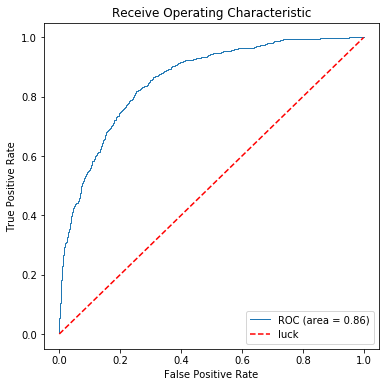

In [51]:
# 综合以上的参数调优，重新构建一个新的模型
clf = GradientBoostingClassifier(n_estimators=90, learning_rate=0.1, min_samples_split=300, min_samples_leaf=20,
                                max_depth=5, max_features=1.0, subsample=0.8, random_state=10)
clf.fit(X_train, y_train)
y_predict_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr, lw=1, label='ROC (area = %.2f)' % (roc_auc))
ax.plot([0, 1], [0, 1], '--', color='red', label='luck')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receive Operating Characteristic')
ax.legend(loc='lower right')
plt.show()